In [133]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from trading_session_gym.envs.trading_session_gym import TradingSession
from baseline_policy import BaselinePolicy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [134]:
mode = 'human'
env = TradingSession(action_space_config = 'discrete')
env.reset()
done = False

policy = BaselinePolicy(mode = 'min_price',
                        constant_order = 1,
                        boundary = env.get_boundary(),
                        action_space_config = 'discrete')

rewards = np.array(env.get_reward())
prices = np.array(env.get_prices())
holdings_quantity = np.array(env.get_holdings_quantity())

min_price = None

while done == False:
    action = policy.select_action(env)
    obs, reward, done, _ = env.step(action)
    env.render(mode=mode)
    rewards = np.append(rewards, reward)
    prices = np.vstack([prices, env.get_prices()])
    holdings_quantity = np.vstack([holdings_quantity, env.get_holdings_quantity()])
    if min_price == None or min_price > env.session_prices.min():
            min_price = env.session_prices.min()

c:\123\thesis\trading-session-gym\venv\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


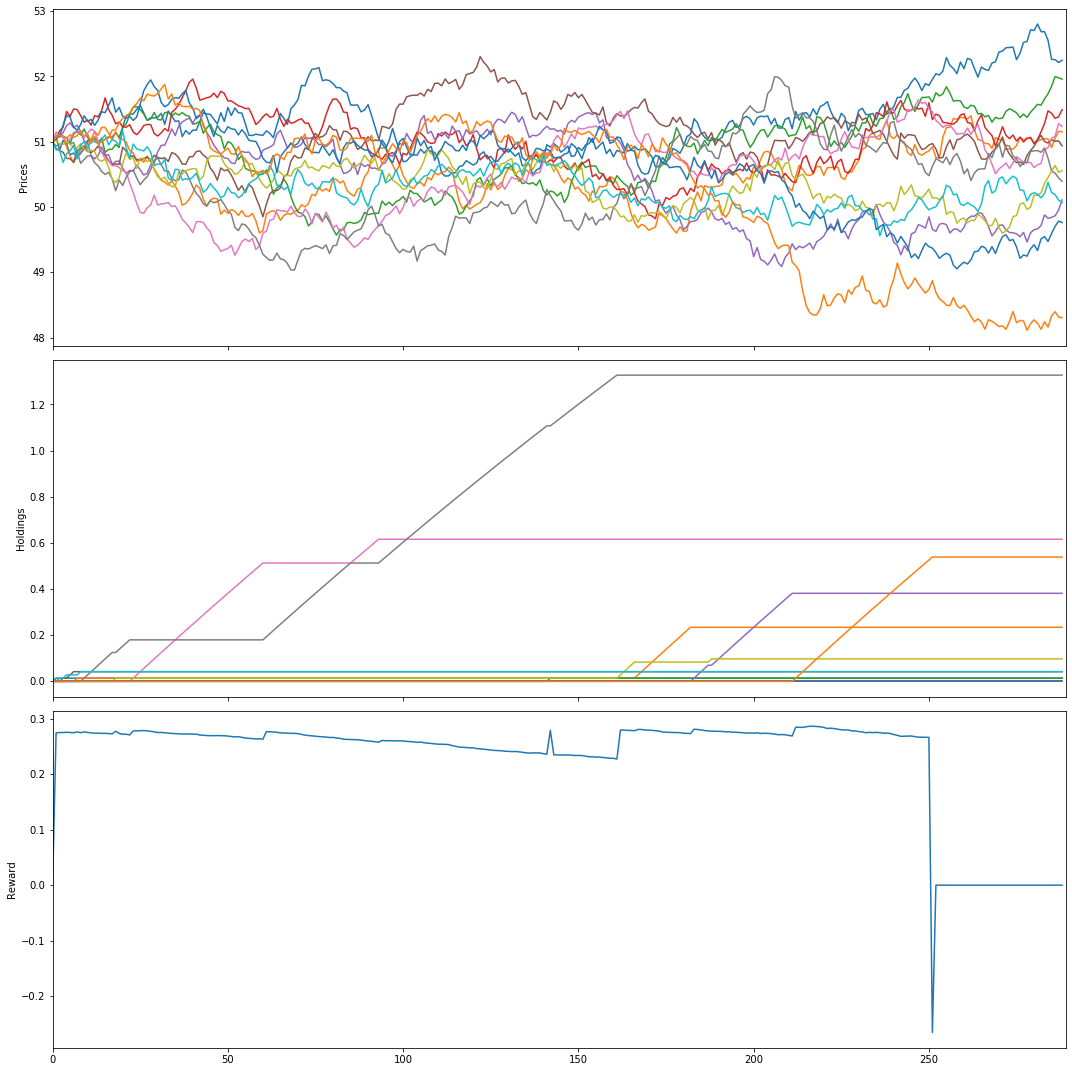

In [135]:
fig, axs = plt.subplots(3, figsize = [15,15], sharex = True)

axs[0].plot(prices)
axs[0].set_ylabel('Prices')

axs[1].plot(holdings_quantity)
axs[1].set_ylabel('Holdings')

axs[2].plot(rewards)
axs[2].set_ylabel('Reward')

axs[0].set_xlim([0, len(prices)])
plt.tight_layout()

In [136]:
optimal_strategy_reward = 1000*env.get_boundary()/(np.min(prices))
naive_strategy_reward = np.add.accumulate(rewards)[-1]
naive_performance = naive_strategy_reward/optimal_strategy_reward

print("Naive performance: {}%". format(round(100*naive_performance, 2)))

Naive performance: 96.47%


In [137]:
naive_strategy_reward

66.1659646816746

In [138]:
optimal_strategy_reward

68.586945860672

In [139]:
env.action_space.sample()

6

In [140]:
min_price

48.11411207467442

In [141]:
env.observation_space.shape[0]

13

In [142]:
obs

array([1.        , 0.97908101, 0.99445329, 0.98550398, 0.95906122,
       0.97489418, 0.98059157, 0.96455367, 0.96766149, 0.95833664,
       0.9524444 , 0.92458414, 1.0020399 ])

In [143]:
env.observation_space.sample()

array([0.22759378, 0.53275734, 0.6388516 , 0.9718301 , 0.2804736 ,
       0.56617695, 0.15670191, 0.92400914, 0.991501  , 0.3710441 ,
       0.29114154, 0.60759276, 3.8277805 ], dtype=float32)